## Lab 3. Extrapolation techniques for accurate thermochemistry



In this lab you will:

## Part A

- Calculate the bond dissociation energy (BDE) in the $F_2$ molecule with a large basis set and accurate correlated method (CCSD(T))

- Perform basis set extrapolation using an exponential or power series extrapolation to accunt for finite basis set effects (intrinsec basis set insufficientcy (IBSI)). 

- How to use the correlation energy additivity scheme.

## Part B

- When trying to compute the interaction energy between dimer complexes, each monomer can technically "borrow" (Or in Prof. David Sherrill's words, "steal") the basis functions from the other monomer. This causes an artificial stabilization of the dimer complex, and hence interaction energies are overestimated in most cases. In order to circumvent this, you will:

- Compute the energy of the monomers in the dimer basis. In this extra step, the first monomer is simulated in the presence of "ghost" atoms of the second monomer (basis functions exist, but electrons are absent), and same for the second monomer. This is called the "Counterpoise" correction formulated by Boys and Bernardi. Psi4 computes the process with a keyword bsse_type='cp'. 


---

In [1]:
import psi4
import numpy as np
import matplotlib.pyplot as plt

## Part A | Lab procedure:

### **1.** 
Optimize geometry of $F_2$ molecule at the *MP2/cc-pvdz* level and calculate the zero-point vibrational energy (ZPE). Write down the equilibrium geometry and ZPE in kcal/mol. 

In [47]:
#RESPONSE 1/5

distances = np.linspace(1.0,3.0,30)


F2 = """
F 0.0 0.0 0.0 
F 0.0 0.0 **R**

units angstrom
symmetry c1
"""

MP2 = []

psi4.core.clean()
psi4.set_options({'reference' : 'uhf'})

for r in distances:
    mol = psi4.geometry(F2.replace("**R**", str(r)))
    energy = psi4.energy("MP2/cc-pvdz", molecule=mol)
    MP2.append(energy)

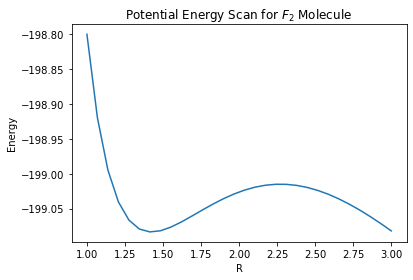

The ground state geometry is at a separation of 1.41 angstroms
The total energy is -199.08 hartrees
The total energy is -124926.71 kcal/mol


In [48]:
#RESPONSE 2/5

plt.plot(distances, MP2)
plt.xlabel("R")
plt.ylabel("Energy")
plt.title("Potential Energy Scan for $F_2$ Molecule")
plt.show()

print(f"The ground state geometry is at a separation of {min(zip(MP2,distances))[1]:.2f} angstroms")
print(f"The total energy is {min(zip(MP2,distances))[0]:.2f} hartrees")
print(f"The total energy is {(min(zip(MP2,distances))[0] * 627.509):.2f} kcal/mol")

In [71]:
#RESPONSE 3/5

psi4.set_options({"reference":"rhf"})


gnd_f2 = psi4.geometry("""
0 1
F 0.0 0.0 0.0
F 0.0 0.0 1.41
symmetry c1
units angstrom
""")

#MP2 is currentl not supported. Let us try just HF
f_energ, f_wfn = psi4.frequencies('HF/cc-pvdz', molecule=gnd_f2, return_wfn=True)

#### The frequencies can be obtained from the wavefunction object of the frequencies. 
Under the hood blobs obtains it but the in order to get them into a numpy array we just require to set:

```
frequencies = f_wfn.frequency_analysis["omega"][2]
```

where f_wfn is the wavefunctions that you obtain from the frequency calculation. 

We know that we need to add the energies associated to these resonances. Of course we add the ones that are non-zero. Remember though, that the energies of the resonances are in $cm^{-1}$. Thus, remember that: $$349.75 cm^{-1} = 1 kcal/mol$$ 

In [131]:
#RESPONSE 4/5
frequencies = f_wfn.frequency_analysis["omega"][2]

#Let us isolate the energies that are larger than zero. 
frequencies = [freq for freq in frequencies if freq > 0.1]

#Obtain the ZPE and add it to the total energy
ZPE = (sum(frequencies) / 349.75) / 2.0

print(f"ZPE: {ZPE.real:.3f} kcal/mol")

print(f"The uncorrected energy in hartrees is {(f_energ).real:.3f} in hartrees")
print(f"The corrected energy in hartrees is {(f_energ + ZPE/627.509).real:.3f} in hartrees")

ZPE: 2.049 kcal/mol
The uncorrected energy in hartrees is -198.686 in hartrees
The corrected energy in hartrees is -198.682 in hartrees


In [130]:
### FREQUENCIES FROM MP2
frequencies_mp2 = np.array(([0.+6.77047915e-06j, 0. ,0.,0.,976.1895723, 0.]))
frequencies_mp2 = [freq for freq in frequencies_mp2 if freq > 0.1]

ZPE = (sum(frequencies_mp2) / 349.75) / 2.

print(f"ZPE: {ZPE.real:.3f} kcal/mol")

print(f"The uncorrected energy in hartrees is {(f_energ).real:.3f} in hartrees")
print(f"The corrected energy in hartrees is {(f_energ + ZPE/627.509).real:.3f} in hartrees")



ZPE: 1.396 kcal/mol
The uncorrected energy in hartrees is -198.686 in hartrees
The corrected energy in hartrees is -198.684 in hartrees


---

### **2.** 
Using the found optimal geometry of $F_2$ molecule, calculate the HF, MP2 and CCSD(T) (coupled cluster with single and double excitations and perturbateive triple correctionsmethod) energies ni a series of the cc-pvdz, cc-pvtz and cc-pvqz bases. Write down all these energies. Write down the number of basis function in each basis. 

#### Hint: The HF and MP2 energies will be printed in the CCSD(T) output file calculations as wee. So that you do not need to separate the calculations. On the other hand you may use a loop to get the energies and avoid having to go through the output file

#### Hint: You can quickly have access to the number of basis functions with"
```
wfn.basisset().nbf()
```

#### Hint: If you create a dictionary with keys as the basis, and then each of the keys contains a dictonary with the basis, you can fill in in a double loop and then display it nicely using pandas. 

```
energies = {"cc-pvdz":{"HF":, "MP2":, "CCSD(T)"}, ...}
```

In [148]:
#RESPONSE 1/3

basis = ['cc-pvdz', 'cc-pvtz', 'cc-pvqz']
method = ['HF', 'MP2', 'CCSD(T)']
mol_energies = {'cc-pvdz': {'HF':0.0, 'MP2':0.0, 'CCSD(T)':0.0, "basis":0.0},
            'cc-pvtz': {'HF':0.0, 'MP2':0.0, 'CCSD(T)':0.0, "basis":0.0},
            'cc-pvqz': {'HF':0.0, 'MP2':0.0, 'CCSD(T)':0.0, "basis":0.0}}

for b in basis:
    for m in method:
        energy, wfn = psi4.energy(f"{m}/{b}", molecule=gnd_f2, return_wfn=True)
        mol_energies[b][m] = energy
        mol_energies[b]["basis"] = wfn.basisset().nbf()

In [156]:
#RESPONSE 2/3
import pandas as pd
df_mol = pd.DataFrame(mol_energies)
df_mol 

,cc-pvdz,cc-pvtz,cc-pvqz
CCSD(T),-199.101016,-199.320398,-199.421927
HF,-198.685732,-198.752236,-198.768517
MP2,-199.083476,-199.299175,-199.399696
basis,28.000000,60.000000,110.000000


### **3.** 
Using the found optimal geometry of $F_2$ molecule, calculate the HF, MP2 and CCSD(T) (coupled cluster with single and double excitations and perturbateive triple correctionsmethod) energies ni a series of the cc-pvdz, cc-pvtz and cc-pvqz bases. Write down all these energies. Write down the number of basis function in each basis. 

In [155]:
#RESPONSE 1/2
f = psi4.geometry("""
0 2
F 0.0 0.0 0.0
symmetry c1
units angstrom
""")

f_energies = {'cc-pvdz': {'HF':0.0, 'MP2':0.0, 'CCSD(T)':0.0, "basis":0.0},
            'cc-pvtz': {'HF':0.0, 'MP2':0.0, 'CCSD(T)':0.0, "basis":0.0},
            'cc-pvqz': {'HF':0.0, 'MP2':0.0, 'CCSD(T)':0.0, "basis":0.0}}

psi4.set_options({"reference":"uhf"})

for b in basis:
    for m in method:
        energy, wfn = psi4.energy(f"{m}/{b}", molecule=f, return_wfn=True)
        f_energies[b][m] = energy
        f_energies[b]["basis"] = wfn.basisset().nbf()

In [159]:
#RESPONSE 2/2
df_e = pd.DataFrame(f_energies)
df_e

,cc-pvdz,cc-pvtz,cc-pvqz
CCSD(T),-99.529312,-99.632143,-99.681564
HF,-99.375250,-99.405519,-99.413768
MP2,-99.517758,-99.617315,-99.665927
basis,14.000000,30.000000,55.000000


---

## Part A | Lab Report:


### **1.** 
Estimate the basis set limits of the HF energies(i.e., complete basis set (CBS) HF energies) for $F_2$ and F by using the following formula:

$$ E^{HF}_{x} = E^{HF}_{CBS} + B e^{-Ax}$$

Where:  
**A**, **B** -> Constants to be determined.    
**E_x** is the HF energy in cc-pv$\mathbf{x}$z basis, specifically it corresponds to the highest angular momentum included in the basis set. 
And **E_{CBS}** is the sought-for energy in the complete basis set. 

The extrapolation scheme requires 3 basis; use the 2,3 and 4 basis to obtain the CBS values (i.e., X=2,3,4) 
#### Hint: Think of building a system of equations.

#### Hint the library scipy has a module that can be accessed as 

```
from scipy.optimize import fsolve
``` 

It can be used to find the solution of non-linear equations. Here is an example for the system:

$$ x^2 = -xy $$
$$ x^3 = -2z^2$$
$$ y^4 = 0$$

```
def equations(var):
    x,y,z = var
    
    f1 = x*2 + xy
    f2 = x**3 + 2z**2
    f3 = y**4
    
    return (f1,f2,f3)
    
x,y,z = fsolve(equations,[x_0, y_0, z_0])

#Where [x_0, y_0, z_0] are the initial guesses for each of the unknowns. For a and b you can try values close to 1, and for E_(cbs) the HF energy. 
```



In [185]:
#RESPONSE 1/3

#### The equations that we need to solve are the following:

1. 
$$ E^{HF}_{2} = E^{HF}_{CBS} - Be^{-2A}$$  


2. 
$$ E^{HF}_{3} = E^{HF}_{CBS} - B e^{-3A}$$  


3. 
$$ E^{HF}_{4} = E^{HF}_{CBS} - B e^{-4A}$$  

With these equations, we have the required number of equations needed to obtain the 3 parameters. 

In [186]:
from scipy.optimize import fsolve

#The energies for the different basis sets are:

#2 -> -198.685732
#3 -> -198.752236
#4 -> -198.768517

In [220]:
def equations(var):
    a,b,cbs = var
    
    f1 = -198.685732 - cbs - b*np.exp(-2*a)
    f2 = -198.752236 - cbs - b*np.exp(-3*a)
    f3 = -198.768517 - cbs - b*np.exp(-4*a)
    
    return (f1,f2,f3)

a,b,cbs = fsolve(equations, [1,1,-200])

print(f"The E_(CBS) for F2 using HF energies is {cbs}")

def equations(var):
    a,b,cbs = var
    
    f1 = -99.375250 - cbs - b*np.exp(-2*a)
    f2 = -99.405519 - cbs - b*np.exp(-3*a)
    f3 = -99.413768 - cbs - b*np.exp(-4*a)
    
    return (f1,f2,f3)

a,b,cbs = fsolve(equations, [1,1,-100])

print(f"The E_(CBS) for F using HF energies is {cbs}")

The E_(CBS) for F2 using HF energies is -198.77379487992843
The E_(CBS) for F using HF energies is -99.4168581903152


---

### **2.** 

Estimate the MP2 and CCSD(T) correlation energy basis set limits (i.e., E(MP2)-E(HF) and E(CCSD(T))-E(HF)) by the following formula:

$$E_x^{corr} = E_{CBS}^{corr} + CX^{-3}$$

Where:  
**C** is a coefficient we required to find.  
**$Ex$** and **$E_{CBS}$** are the correlation energies in the cc-pvxz basis and CBS limit.  

This is two-point scheme, you need two basis sets to obtain CBS energies. Calculate Mp2 and CCSD(T) CBS *correlation* energies using 1) X=2,3 and 2) X= 3,4 


In [ ]:
#RESPONSE

#The correlation energies for F2 with MP2 and CCSD(T) are:

#MP2
#2->-199.083476 - (-198.685732)
#3->-199.299175 - (-198.685732)
#4->-199.399696 - (-198.768517)

#CCSD(T)
#2-> -199.101016 -(-198.685732)
#3-> -199.320398 -(-198.685732)
#4-> -199.421927 -(-198.768517)

In [232]:
#RESPONSE

#MP2(2,3)

def equations(var):
    c, corr = var
    f1 = -0.14250800000000652 - corr + c*2**(-3)
    f2 = -0.21179600000000676 - corr + c*3**(-3)
    return (f1, f2)

c, corr = fsolve(equations, [1,-1])

print(f"MP2(2,3) correlation energy for F is {corr}")

def equations(var):
    c, corr = var
    f1 = -0.21179600000000676 - corr + c*3**(-3)
    f2 = -0.2521589999999918 - corr + c*4**(-3)
    return (f1, f2)

c, corr = fsolve(equations, [1,-1])

print(f"MP2(3,4) correlation energy for F is {corr}")


def equations(var):
    c, corr = var
    f1 = -0.3977439999999888 - corr + c*2**(-3)
    f2 = -0.6134429999999895 - corr + c*3**(-3)
    return (f1, f2)

c, corr = fsolve(equations, [1,-1])

print(f"MP2(2,3) correlation energy for F_2 is {corr}")

def equations(var):
    c, corr = var
    f1 = -0.6134429999999895 - corr + c*3**(-3)
    f2 = -0.6311790000000030 - corr + c*4**(-3)
    return (f1, f2)

c, corr = fsolve(equations, [1,-1])

print(f"MP2(3,4) correlation energy for F_2 is {corr}")

MP2(2,3) correlation energy for F is -0.24096989473684896
MP2(3,4) correlation energy for F is -0.281613081081062
MP2(2,3) correlation energy for F_2 is -0.7042636315789372
MP2(3,4) correlation energy for F_2 is -0.6441214864864994


In [231]:
#RESPONSE

#MP2(2,3)

def equations(var):
    c, corr = var
    f1 = -0.15406200000001036 - corr + c*2**(-3)
    f2 = -0.22662400000000105 - corr + c*3**(-3)
    return (f1, f2)

c, corr = fsolve(equations, [1,-1])

print(f"CCSD(T)(2,3) correlation energy for F is {corr}")

def equations(var):
    c, corr = var
    f1 = -0.22662400000000105 - corr + c*3**(-3)
    f2 = -0.26779599999998993 - corr + c*4**(-3)
    return (f1, f2)

c, corr = fsolve(equations, [1,-1])

print(f"CCSD(T)(3,4) correlation energy for F is {corr}")


def equations(var):
    c, corr = var
    f1 = -0.41528399999998555 - corr + c*2**(-3)
    f2 = -0.6346660000000099 - corr + c*3**(-3)
    return (f1, f2)

c, corr = fsolve(equations, [1,-1])

print(f"CCSD(T)(2,3) correlation energy for F2 is {corr}")

def equations(var):
    c, corr = var
    f1 = -0.6346660000000099 - corr + c*3**(-3)
    f2 = -0.653410000000008 - corr + c*4**(-3)
    return (f1, f2)

c, corr = fsolve(equations, [1,-1])

print(f"CCSD(T)(3,4) correlation energy for F2 is {corr}")

CCSD(T)(2,3) correlation energy for F is -0.2571764210526287
CCSD(T)(3,4) correlation energy for F is -0.29784043243241426
CCSD(T)(2,3) correlation energy for F2 is -0.7270373684210728
CCSD(T)(3,4) correlation energy for F2 is -0.6670880540540607


---

### **2.1** 

Calculate the MP2 and CCSD(T) total energy CBS limits, which are sums of the HF CBS energies and the correlation CBS energies. Note that you will have two different values of the CBS energies. Refer them as CBS(2,3) and CBSD(3,4). That is, in this step you calculate:

MP2/CBS(2,3)  
MP2/CBS(3,4)  
CCSD(T)/CBS(2,3)  
CCSD(T)/CBS(3,4) 

Energies of **$F_2$** and **$F$**

#### If you created your dictionary with basis sets and energies. You can use it again here to add the previous results in a new keys "CBS(2,3)" and CBS(3,4). 

In [236]:
f_energies

{'cc-pvdz': {'HF': -99.37525020985241,
  'MP2': -99.51775797024081,
  'CCSD(T)': -99.52931249546907,
  'basis': 14},
 'cc-pvtz': {'HF': -99.40551931539102,
  'MP2': -99.61731492045097,
  'CCSD(T)': -99.63214306410504,
  'basis': 30},
 'cc-pvqz': {'HF': -99.41376829608419,
  'MP2': -99.66592682522803,
  'CCSD(T)': -99.68156437361009,
  'basis': 55}}

In [250]:
cbs_23 = {"CBS(2,3)": {"MP2":-198.77379487992843 + -0.7042636315789372, 
                       "CCSD(T)" : -198.77379487992843 + -0.7270373684210728}}

cbs_34 = {"CBS(3,4)": {"MP2":-198.77379487992843 + -0.6441214864864994, 
                       "CCSD(T)" : -198.77379487992843 + -0.6670880540540607}}

mol_energies.update(cbs_23)
mol_energies.update(cbs_34)

In [261]:
print("\n F energies")
pd_mol = pd.DataFrame(mol_energies)
pd_mol


 F energies


,cc-pvdz,cc-pvtz,cc-pvqz,"CBS(2,3)","CBS(3,4)"
CCSD(T),-199.101016,-199.320398,-199.421927,-199.500832,-199.440883
HF,-198.685732,-198.752236,-198.768517,NaN,NaN
MP2,-199.083476,-199.299175,-199.399696,-199.478059,-199.417916
basis,28.000000,60.000000,110.000000,NaN,NaN


In [252]:
cbs_23 = {"CBS(2,3)": {"MP2":-99.4168581903152 + -0.24096989473684896, 
                       "CCSD(T)" : -99.4168581903152 + -0.2571764210526287}}

cbs_34 = {"CBS(3,4)": {"MP2":-99.4168581903152 + -0.281613081081062, 
                       "CCSD(T)" : -99.4168581903152 + -0.29784043243241426}}

f_energies.update(cbs_23)
f_energies.update(cbs_34)

In [263]:
print("\n F2 energies")
pd_f = pd.DataFrame(f_energies)
pd_f


 F2 energies


,cc-pvdz,cc-pvtz,cc-pvqz,"CBS(2,3)","CBS(3,4)"
CCSD(T),-99.529312,-99.632143,-99.681564,-99.674035,-99.714699
HF,-99.375250,-99.405519,-99.413768,NaN,NaN
MP2,-99.517758,-99.617315,-99.665927,-99.657828,-99.698471
basis,14.000000,30.000000,55.000000,NaN,NaN


---

### **3** 

Calculate the bond dissociation energies:

$$ E_{diss} = E(F_2) - 2E(F) $$

By HF, MP2 and CCSD(T) in different basis sets.

#### Hint: If you have been following the Notebook with Pandas. This step should be effortless. Just substract the molecular dataframe minus two times the atom data frame. 


In [299]:
print("\n Bond Dissociation Energies")

BDE = (pd_mol - 2*pd_f) * 627.509
BDE["cc-pvdz"]["basis"] = 28
BDE["cc-pvtz"]["basis"] = 60
BDE["cc-pvqz"]["basis"] = 110
BDE["CBS(2,3)"]["basis"] = 60
BDE["CBS(3,4)"]["basis"] = 110

BDE["CBS(2,3)"]["HF"] = 37.035057
BDE["CBS(3,4)"]["HF"] = 37.035057




BDE


 Bond Dissociation Energies


,cc-pvdz,cc-pvtz,cc-pvqz,"CBS(2,3)","CBS(3,4)"
CCSD(T),-26.600990,-35.210797,-36.896510,-95.860173,-7.207373
HF,40.642497,36.898960,37.035057,37.035057,37.035057
MP2,-30.095535,-40.502722,-42.571563,-101.908931,-13.161263
basis,28.000000,60.000000,110.000000,60.000000,110.000000


---

### **3.1** 

Plot HF, MP2, and CCSD(T) bond dissociation energies vs the size of the basis set including CBS values. Find an experimental value of BDE in $F_2$ And add the experimental BDE to the plot and compare it with the calculated BDEs. 

#### Attention: When comparing experimental values and computational BDEs, you need to account for ZPE energy. You may either shift experimental BDE energy by computed ZPE or include ZPE in all computational values of BDEs

In [321]:
BDE.columns

Index(['cc-pvdz', 'cc-pvtz', 'cc-pvqz', 'CBS(2,3)', 'CBS(3,4)'], dtype='object')

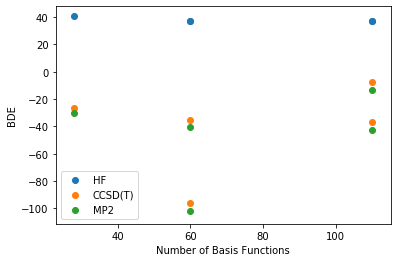

In [323]:
plt.scatter(BDE.iloc[3,:].to_list(), BDE.iloc[1,:].to_list(), label="HF")
plt.scatter(BDE.iloc[3,:].to_list(), BDE.iloc[0,:].to_list(), label="CCSD(T)")
plt.scatter(BDE.iloc[3,:].to_list(), BDE.iloc[2,:].to_list(), label="MP2")


plt.ylabel("BDE")
plt.xlabel("Number of Basis Functions")

plt.legend()